In [1]:
%matplotlib inline

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from msslib.utils import *
import matplotlib.pyplot as plt
import functools as f

In [11]:
data_dir = "/home/finlay/HMT/data/VenetusA/block_samples/"
all_file_paths = listpaths(data_dir)
data_paths = sorted(list(filter(lambda x: '_data.npy' in x, all_file_paths)))
label_paths = sorted(list(filter(lambda x: '_label.npy' in x, all_file_paths)))

In [38]:
def load_data(p):
    d = np.load(p)
    w = np.reshape(d, (np.product(d.shape[:2]), d.shape[2]))
    return w

def load_label(p):
    l = np.load(p)
    return l.flatten() / 10

d1 = load_data(data_paths[0])
l1 = load_label(label_paths[0])


labels, data = f.reduce(lambda x, y: (
        np.append(x[0], load_label(y[0])),
        np.concatenate((x[1], load_data(y[1])), axis=0), 
    ), zip(label_paths[1:20], data_paths[1:20]), 
    (l1, d1))


In [39]:
labels.shape

(54000,)

In [40]:
data.shape

(54000, 1681)

In [31]:
d1.shape

AttributeError: 'list' object has no attribute 'shape'

In [41]:
pca = PCA(n_components=3, whiten=True)
lda = LinearDiscriminantAnalysis(n_components=3)

In [43]:
pca.fit(data)

PCA(copy=True, n_components=3, whiten=True)

In [44]:
lda.fit(data,labels)

/usr/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [46]:
p_d = pca.transform(data)
l_d = lda.transform(data)

In [47]:
p_rot = np.rot90(p_d)
l_rot = np.rot90(l_d)

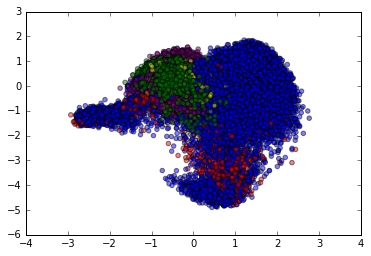

In [53]:
c = ['red','blue','green','yellow','purple']
cols = [c[int(i)] for i in labels]
plt.scatter(p_rot[0], p_rot[1],c=cols, alpha=0.5)
plt.show()

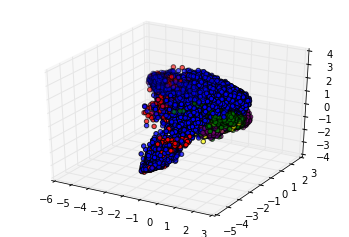

In [54]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(p_rot[1], p_rot[2], p_rot[0], zdir='z', c=cols, depthshade=True)